In [1]:
import warnings
warnings.filterwarnings('ignore')
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import gsd.hoomd
from flowermd.base import Pack, Simulation
from flowermd.library import EllipsoidForcefield, EllipsoidChain
from flowermd.utils import get_target_box_number_density
from flowermd.utils.rigid_body import create_rigid_body
import unyt as u
import hoomd

In [6]:
ellipsoid_chain = EllipsoidChain(lengths=4,num_mols=2,lpar=1.0,bead_mass=1.0,bond_length=1.0)
ff = EllipsoidForcefield(epsilon=1.0,lpar=1.0,lperp=0.5,r_cut=2.0,bond_k=1.0,bond_r0=0.1,angle_k=50,angle_theta0=1.9)
ff.hoomd_forces
system = Pack(molecules=ellipsoid_chain, density=0.005*u.Unit("nm**-3"), packing_expand_factor=11,edge=2,overlap=1)
gsd_path=('ellipsoid-melt-4mers.gsd')
rigid_frame, rigid = create_rigid_body(
    system.hoomd_snapshot,
    ellipsoid_chain.bead_constituents_types,
    bead_name="R",
)
ellipsoid_sim = Simulation(
    initial_state=rigid_frame,
    forcefield=ff.hoomd_forces,
    rigid_constraint=rigid,
    gsd_write_freq=int(1e4),
    gsd_file_name=gsd_path,
    log_write_freq=int(1e4),
    log_file_name='log.txt',
)
target_box = get_target_box_number_density(density=0.005*u.Unit("nm**-3"),n_beads=1)
ellipsoid_sim.run_update_volume(final_box_lengths=target_box, kT=2.0, n_steps=1e5,tau_kt=0.001,period=10,thermalize_particles=True)
ellipsoid_sim.run_NVT(n_steps=5e6, kT=3.0, tau_kt=1)
ellipsoid_sim.flush_writers()
traj = gsd.hoomd.open('ellipsoid-melt-4mers.gsd')

Initializing simulation state from a gsd.hoomd.Frame.
Step 10000 of 100000; TPS: 2292.54; ETA: 0.7 minutes
Step 20000 of 100000; TPS: 2833.35; ETA: 0.5 minutes
Step 30000 of 100000; TPS: 3213.02; ETA: 0.4 minutes
Step 40000 of 100000; TPS: 3540.55; ETA: 0.3 minutes
Step 50000 of 100000; TPS: 3838.75; ETA: 0.2 minutes
Step 60000 of 100000; TPS: 4113.81; ETA: 0.2 minutes
Step 70000 of 100000; TPS: 4361.76; ETA: 0.1 minutes
Step 80000 of 100000; TPS: 4586.51; ETA: 0.1 minutes
Step 90000 of 100000; TPS: 4784.67; ETA: 0.0 minutes
Step 100000 of 100000; TPS: 4957.67; ETA: 0.0 minutes
Step 9999 of 5000000; TPS: 7440.6; ETA: 11.2 minutes
Step 19999 of 5000000; TPS: 7450.27; ETA: 11.1 minutes
Step 29999 of 5000000; TPS: 7431.29; ETA: 11.1 minutes
Step 39999 of 5000000; TPS: 7432.41; ETA: 11.1 minutes
Step 49999 of 5000000; TPS: 7440.11; ETA: 11.1 minutes
Step 59999 of 5000000; TPS: 7450.83; ETA: 11.1 minutes
Step 69999 of 5000000; TPS: 7450.03; ETA: 11.0 minutes
Step 79999 of 5000000; TPS: 7452

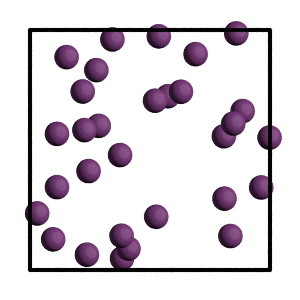

In [4]:
from cmeutils.visualize import FresnelGSD

sim_visualizer = FresnelGSD(
    gsd_file="ellipsoid-melt-90.gsd", frame=10, view_axis=(1, 0, 0)
)
sim_visualizer.view()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from cmeutils.sampling import is_equilibrated

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [6]:
shrink_cut = 200
log = np.genfromtxt("log.txt", names=True)
pe = log["mdcomputeThermodynamicQuantitiespotential_energy"]
print(len(pe))
# equil: bool (True or False), t0: int (starting data point that you can sample from), neff: number of data points in equilibrated region
equil, t0, g, neff = is_equilibrated(data=pe[shrink_cut:], threshold_neff=200)
print(equil)

1011
True
